In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Customers_in_a_Shop.csv',header=None)

In [7]:
df.head()

0      1
0  1949-01  114.0
1  1949-02  120.0
2  1949-03  134.0
3  1949-04   67.0
4  1949-05  123.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       144 non-null    object 
 1   1       140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [11]:
df.columns=['Month', 'Customer']

In [17]:
df.set_index('Month', inplace=True)

In [18]:
df

Customer
Month            
1949-01     114.0
1949-02     120.0
1949-03     134.0
1949-04      67.0
1949-05     123.0
...           ...
1960-08     606.0
1960-09     508.0
1960-10     720.0
1960-11     750.0
1960-12     732.0

[144 rows x 1 columns]

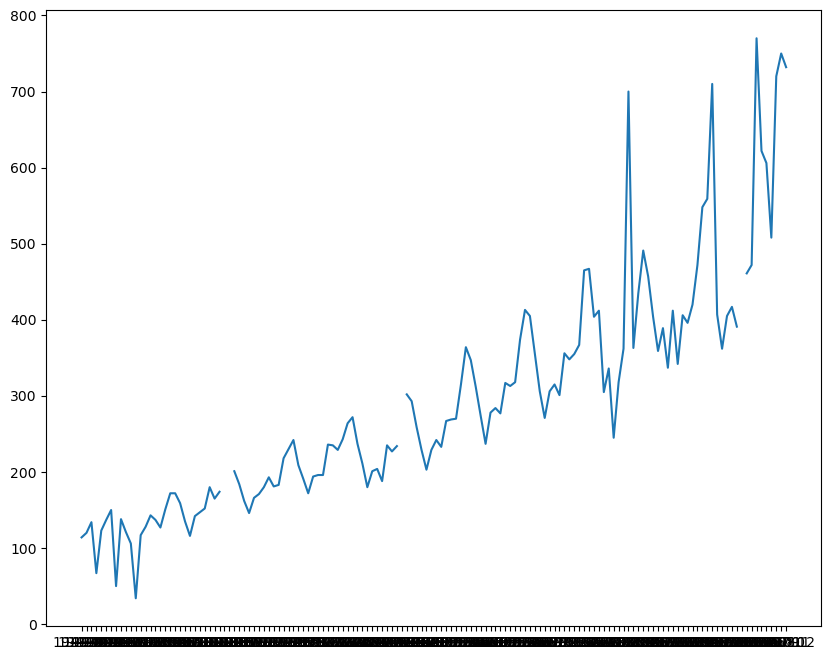

In [21]:
plt.figure(figsize=(10,8))
plt.plot(df)

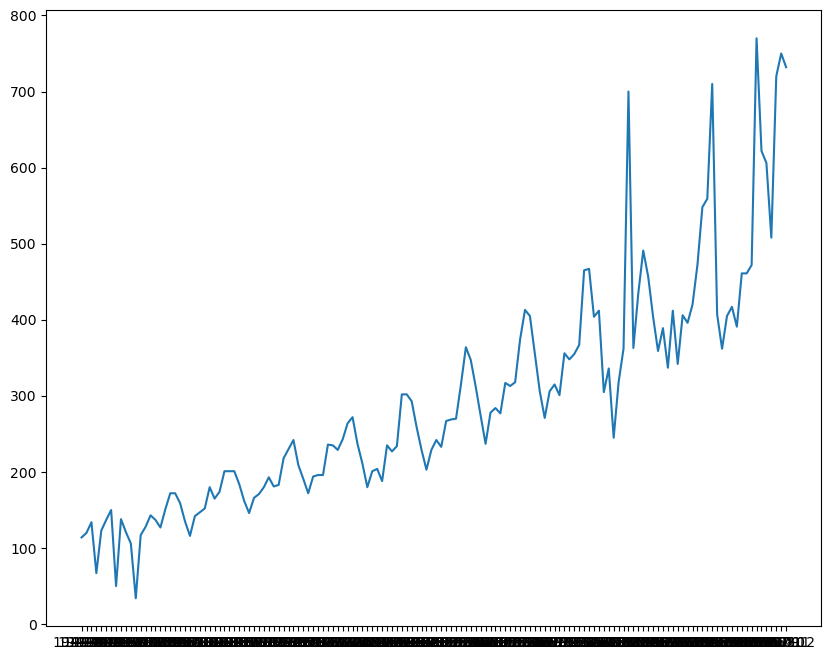

In [22]:
plt.figure(figsize=(10,8))
plt.plot(df.bfill())

<AxesSubplot:xlabel='Customer'>

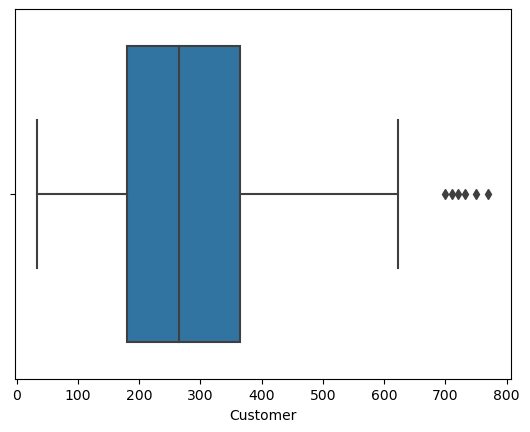

In [23]:
sns.boxplot(x=df.bfill()['Customer'])

In [24]:
df1= df.bfill().copy()

In [25]:
df1

Customer
Month            
1949-01     114.0
1949-02     120.0
1949-03     134.0
1949-04      67.0
1949-05     123.0
...           ...
1960-08     606.0
1960-09     508.0
1960-10     720.0
1960-11     750.0
1960-12     732.0

[144 rows x 1 columns]

In [26]:
df1[df1.Customer>650]=np.nan

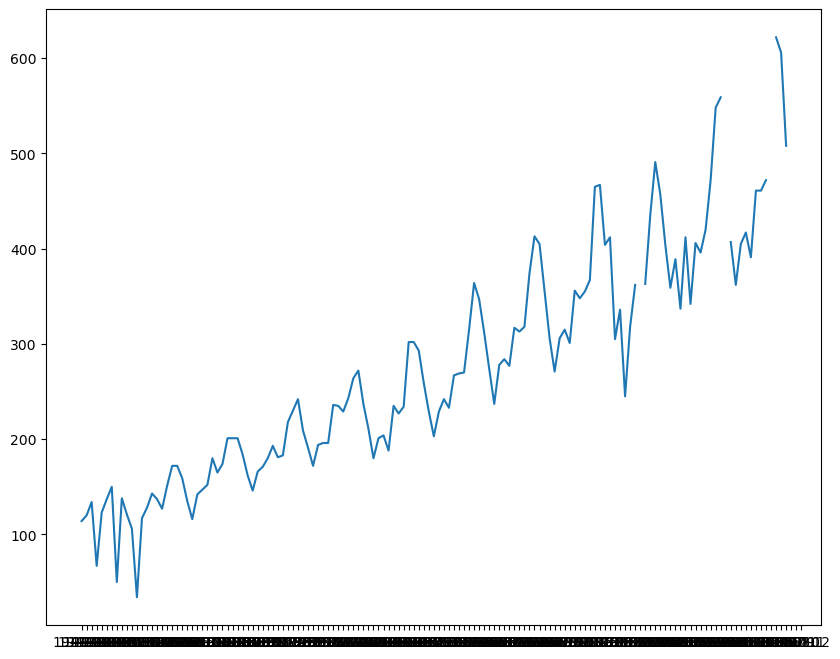

In [27]:
plt.figure(figsize=(10,8))
plt.plot(df1)

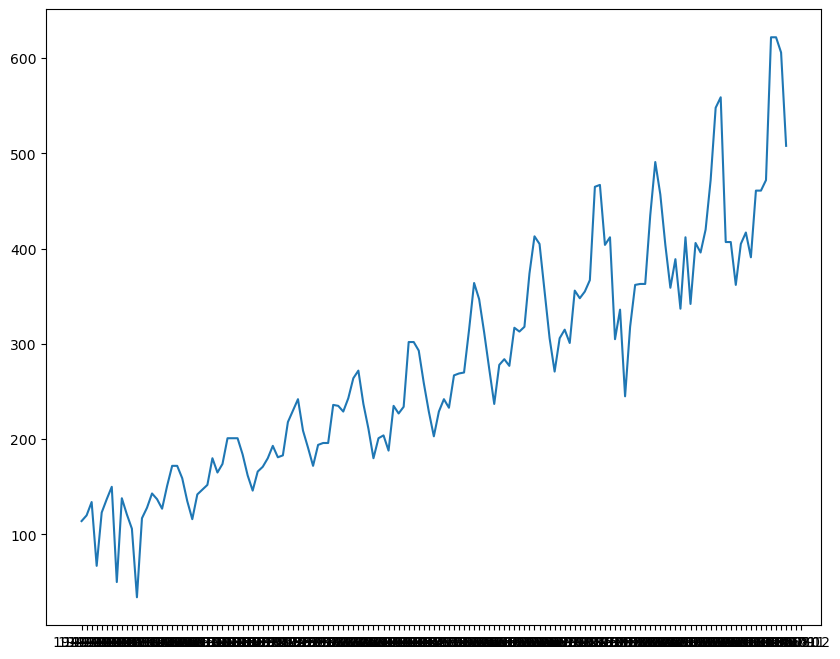

In [28]:
plt.figure(figsize=(10,8))
plt.plot(df1.bfill())

In [31]:
df1.bfill()

Customer
Month            
1949-01     114.0
1949-02     120.0
1949-03     134.0
1949-04      67.0
1949-05     123.0
...           ...
1960-08     606.0
1960-09     508.0
1960-10       NaN
1960-11       NaN
1960-12       NaN

[144 rows x 1 columns]

In [32]:
df2 = df1.bfill().dropna().copy()

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 1949-01 to 1960-09
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  141 non-null    float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [38]:
df2.reset_index(inplace=True)

In [40]:
df2.Month = pd.to_datetime(df2.Month)

In [43]:
df2.set_index('Month', inplace=True)

In [44]:
df2

Customer
Month               
1949-01-01     114.0
1949-02-01     120.0
1949-03-01     134.0
1949-04-01      67.0
1949-05-01     123.0
...              ...
1960-05-01     472.0
1960-06-01     622.0
1960-07-01     622.0
1960-08-01     606.0
1960-09-01     508.0

[141 rows x 1 columns]

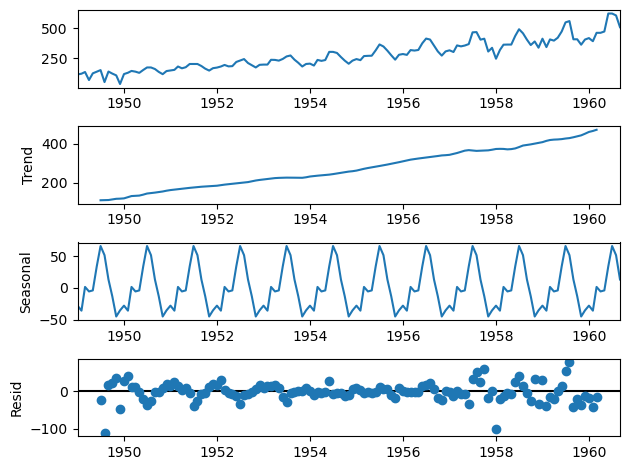

In [49]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df2)
decomposition.plot()
plt.show()